# In this project, we will be exploring an apartment rental dataset and building a model to predict rental prices. <br >
The dataset can be found [here.](https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified).

The UCI Apartments For Rent dataset contains data on apartments up for rent across all 50 states in the US.

There are **10,000 observations** with information about them spread across **22 features**.


## Dataset Attribute Information

1. **id**: Apartment id
2. **category** : Category ("housing/rent/apartment").
3. **title** : Description of the apartment, as well as its address.
4. **body** : Description of where the apartment is located (as a paragraph).
5. **amenities** : List of amenities provided, or NaN if there are none.
6. **bathrooms** : Number of bathrooms in the apartment.
7. **bedrooms** : Number of bedrooms in the apartment.
8. **currency** : Type of currency that the apartment price is given in.
9. **fee** : Whether or not the apartment has a fee
10. **has_photo** : Whether or not the apartment listing has a photo
11. **pets_allowed** : What kinds of pets are allowed
12. **price** : The price of the apartment, in the currency given in the "currency" attribute
13. **price_display** : The price, displayed with its associated currency symbol
14. **price_type** : Lists whether the price is given in weekly, monthly, or weekly/monthly
15. **square_feet** : Area of the apartment, in square feet
16. **address** : Address (or NaN if none applicable) of the apartment
17. **cityname** : Name of the city the apartment is in
18. **state** : Name of the state the apartment is in
19. **latitude** : Latitude of the apartment's location
20. **longitude** : Longitude of the apartment's location
21. **source** : Website where the apartment listing was found
22. **time** : Time that apartment listing went up

### Clone the dataset:


In [2]:
!git clone https://github.com/Daniel-Tran3/CSE_151A_Project.git

Cloning into 'CSE_151A_Project'...


### Import the necessary libraries:

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

### Read the csv into a pandas dataframe:

In [4]:
apartments_df = pd.read_csv("CSE_151A_Project/apartments_for_rent_classified_10K_utf.csv")

### Display the dataframe, with all of its attributes:

In [5]:
with pd.option_context("display.max_columns", None):
  display(apartments_df)

id                category  \
0     5668626895  housing/rent/apartment   
1     5664597177  housing/rent/apartment   
2     5668626833  housing/rent/apartment   
3     5659918074  housing/rent/apartment   
4     5668626759  housing/rent/apartment   
...          ...                     ...   
9995  5630240092  housing/rent/apartment   
9996  5668640983  housing/rent/apartment   
9997  5668643292  housing/rent/apartment   
9998  5668662559  housing/rent/apartment   
9999  5509132540  housing/rent/apartment   

                                                  title  \
0     Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                     Studio apartment 814 Schutte Road   
2     Studio apartment N Scott St, 14th St N, Arling...   
3                        Studio apartment 1717 12th Ave   
4     Studio apartment Washington Blvd, N Cleveland ...   
...                                                 ...   
9995                 Five BR 5407 Abbott Place - Abbott   
9996                            Six BR 256 Las Entradas   
9997                        Six BR 9908 Bentcross Drive   
9998                        One BR in New York NY 10069   
9999         Beautiful Lawrenceville Apartment for rent   

                                                   body  \
0     This unit is located at second St NE, Uhland T...   
1     This unit is located at 814 Schutte Road, Evan...   
2     This unit is located at N Scott St, 14th St N,...   
3     This unit is located at 1717 12th Ave, Seattle...   
4     This unit is located at Washington Blvd, N Cle...   
...                                                 ...   
9995  This unit is located at 5407 Abbott Place - Ab...   
9996  This unit is located at 256 Las Entradas, Mont...   
9997  This unit is located at 9908 Bentcross Drive, ...   
9998  Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...   
9999  Square footage: 880 sq. feet, unit number: 150...   

                                              amenities  bathrooms  bedrooms  \
0                                                   NaN        NaN       0.0   
1                                                   NaN        NaN       1.0   
2                                                   NaN        1.0       0.0   
3                                                   NaN        1.0       0.0   
4                                                   NaN        NaN       0.0   
...                                                 ...        ...       ...   
9995                                                NaN        4.0       5.0   
9996                                                NaN        8.0       6.0   
9997                                                NaN        8.5       6.0   
9998  Basketball,Cable or Satellite,Doorman,Hot Tub,...        NaN       1.0   
9999                                     Gym,Patio/Deck        1.0       1.0   

     currency fee  has_photo pets_allowed  price price_display price_type  \
0         USD  No  Thumbnail         None    790       $790.00    Monthly   
1         USD  No  Thumbnail         None    425       $425.00    Monthly   
2         USD  No  Thumbnail         None   1390     $1,390.00    Monthly   
3         USD  No  Thumbnail         None    925       $925.00    Monthly   
4         USD  No  Thumbnail         None    880       $880.00    Monthly   
...       ...  ..        ...          ...    ...           ...        ...   
9995      USD  No  Thumbnail         None   6000     $6,000.00    Monthly   
9996      USD  No  Thumbnail         None  25000    $25,000.00    Monthly   
9997      USD  No  Thumbnail         None  11000    $11,000.00    Monthly   
9998      USD  No  Thumbnail          NaN   4790     $4,790.00    Monthly   
9999      USD  No         No          NaN   1009     $1,009.00    Monthly   

      square_feet                    address       cityname state  latitude  \
0             101                        NaN     Washington    DC   38.9057   
1             106      

### List the statistics of numeric attributes:

In [6]:
apartments_df.describe().round(2)

id  bathrooms  bedrooms     price  square_feet  latitude  \
count  1.000000e+04    9966.00   9993.00  10000.00     10000.00   9990.00   
mean   5.623396e+09       1.38      1.74   1486.28       945.81     37.70   
std    7.021025e+07       0.62      0.94   1076.51       655.76      5.50   
min    5.508654e+09       1.00      0.00    200.00       101.00     21.32   
25%    5.509248e+09       1.00      1.00    949.00       649.00     33.68   
50%    5.668610e+09       1.00      2.00   1270.00       802.00     38.81   
75%    5.668626e+09       2.00      2.00   1695.00      1100.00     41.35   
max    5.668663e+09       8.50      9.00  52500.00     40000.00     61.59   

       longitude          time  
count    9990.00  1.000000e+04  
mean      -94.65  1.574891e+09  
std        15.76  3.762395e+06  
min      -158.02  1.568744e+09  
25%      -101.30  1.568781e+09  
50%       -93.65  1.577358e+09  
75%       -82.21  1.577359e+09  
max       -70.19  1.577362e+09

### List the number of NaN entries in each attribute:

In [7]:
apartments_df.isna().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     1748
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

We want to isolate which columns contain large amounts of missingess so that we can address them before training our model.

There is a significant number of cells that are missing in the **amenities, pets_allowed, and address columns**.

For the purposes of our price prediction model, we can drop the address column as cityname is easier to encode and would provide similar insight into the costs of apartments in a given location.

We will see how other variables correlate with rent price using visualizations. From there, can decide whether the best course of action is to impute missing values or drop the column if it isn't applicable.

### Display the number of NaN entries in each attribute as a histplot:

[Text(0.5, 1.0, 'Missing Data')]

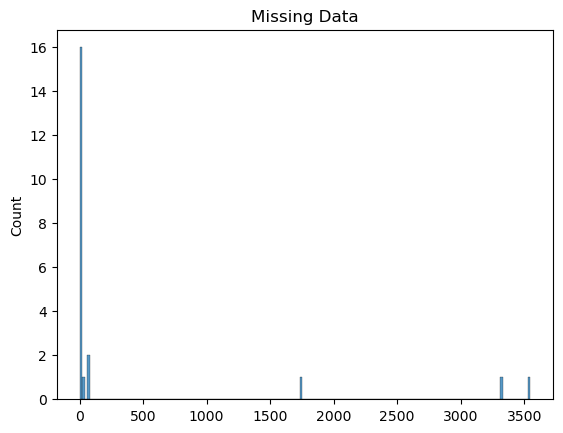

In [8]:
sns.histplot(apartments_df.isna().sum()).set(title='Missing Data')

### Plot the number of apartments in each state:

<Axes: xlabel='state', ylabel='Count'>

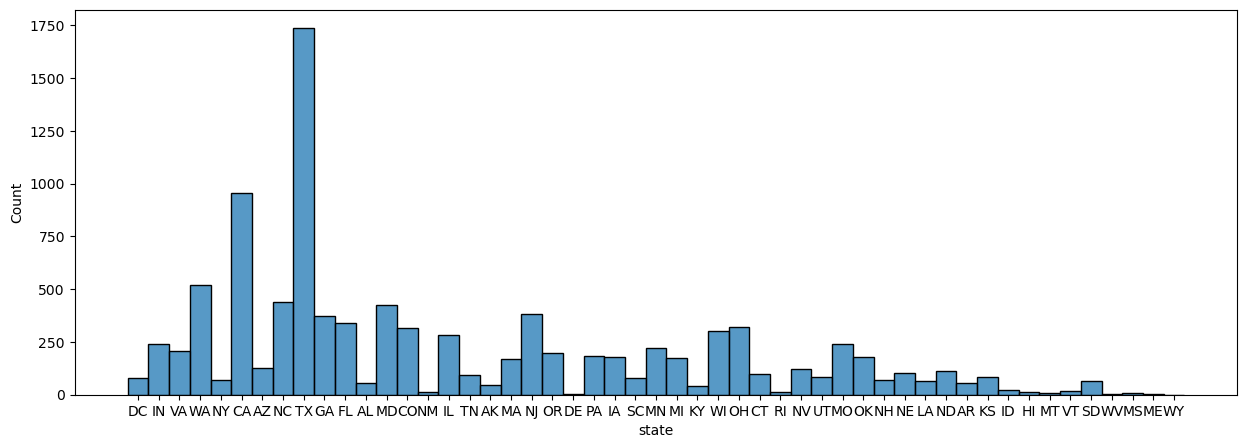

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.histplot(apartments_df['state'], ax=ax)

### Prune the dataset for attributes that will not be explored:

In [10]:
print(apartments_df.columns)
#Remove some columns from apartments_df that are too specific to be relevant for measuring purposes
measured_df = apartments_df[["amenities", "bathrooms", "bedrooms", "fee", "price", "price_type", "square_feet", "cityname", "state", "time"]]

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')


### Display the new, pruned dataframe

In [11]:
measured_df.head()

amenities  bathrooms  bedrooms fee  price price_type  square_feet  \
0       NaN        NaN       0.0  No    790    Monthly          101   
1       NaN        NaN       1.0  No    425    Monthly          106   
2       NaN        1.0       0.0  No   1390    Monthly          107   
3       NaN        1.0       0.0  No    925    Monthly          116   
4       NaN        NaN       0.0  No    880    Monthly          125   

     cityname state        time  
0  Washington    DC  1577359415  
1  Evansville    IN  1577017063  
2   Arlington    VA  1577359410  
3     Seattle    WA  1576667743  
4   Arlington    VA  1577359401

### Standardize the prices:

Some listings have rent calculated as a weekly cost. Before analyzing different columns and their relationships with price, we must convert all prices to monthly costs.

In [12]:
#Convert any prices measured in Weeks to Months by converting to price per day then price per year then price per month (roughly 4.348 multiplier)
for i in measured_df.index:
  if (measured_df['price_type'][i] == "Weekly"):
    measured_df.loc[i, 'price'] = measured_df['price'][i] / 7 * 365.25 / 12

# the there is only one apart with 'weekly' price_type. The price for 'week' is 1560. If we use the formula above, it would be really large number. Consider that as any outlier?
# There is also one record with 'Monthly|Weekely' price_type. Price 275.0, how to interpret that?

### Check the number of unique values for every attribute:

In [13]:
for column in measured_df.columns:
    num_unique_values = measured_df[column].nunique()
    print(f"Data type of {column}: {measured_df[column].dtype} with number of unique values: {num_unique_values}")
# all value of 'fee' is 'No'

Data type of amenities: object with number of unique values: 2254
Data type of bathrooms: float64 with number of unique values: 14
Data type of bedrooms: float64 with number of unique values: 10
Data type of fee: object with number of unique values: 1
Data type of price: float64 with number of unique values: 1726
Data type of price_type: object with number of unique values: 3
Data type of square_feet: int64 with number of unique values: 1738
Data type of cityname: object with number of unique values: 1574
Data type of state: object with number of unique values: 51
Data type of time: int64 with number of unique values: 6310


Note: Amenities is expressed as a string containing a list of facilities (pools, gyms, parking, etc.) in alphabetical order. There are only around 20 or so unique amenities being offered, however listings will have different numbers of those select amenities, resulting in the 2,254 unique values seen above.

### Generate plots of average and median price by city and state:

To analyze how useful the state and city columns are for price prediction, we used mean and median aggregates to create a barplot of prices across locations.

<Axes: xlabel='cityname'>

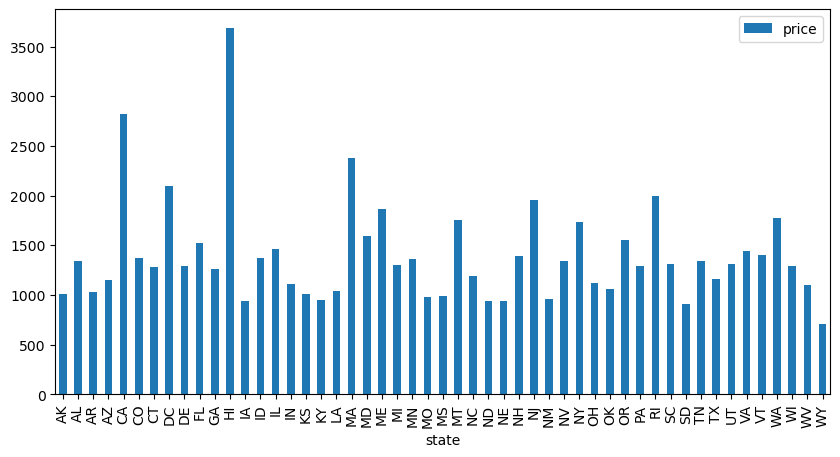

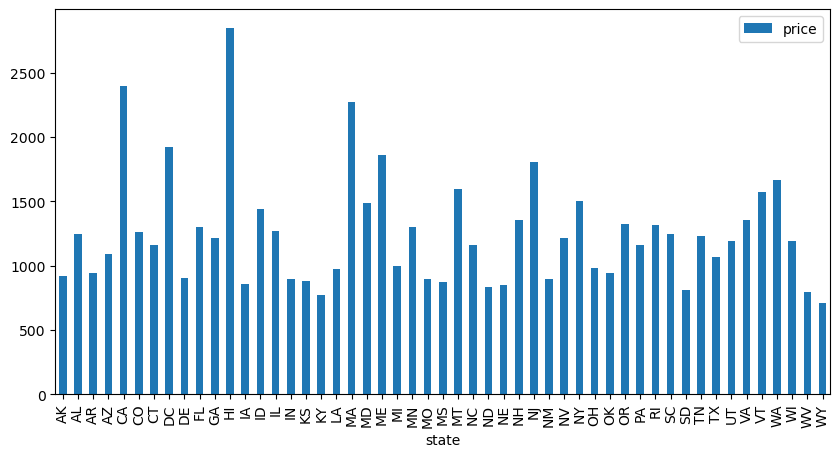

In [14]:
# Generate plots of average and median price by city and state

avg_price_by_state = apartments_df.groupby("state", as_index=False)["price"].mean()
avg_price_by_state.plot(x="state", y="price", kind="bar", figsize=(10,5))

median_price_by_state = apartments_df.groupby("state", as_index=False)["price"].median()
median_price_by_state.plot(x="state", y="price", kind="bar", figsize=(10,5))

avg_price_by_city = apartments_df.groupby("cityname", as_index=False)["price"].mean()
avg_price_by_city.plot(x="cityname", y="price", kind="bar", figsize=(300,50))

median_price_by_city = apartments_df.groupby("cityname", as_index=False)["price"].median()
median_price_by_city.plot(x="cityname", y="price", kind="bar", figsize=(300,50))

The variation in the bar heights for our state plots and our city plots is a good sign that location has a significant effect on price.

### Check the outliers from the previous step:

In [15]:
print("Max state average price: ")
print(avg_price_by_state.loc[[avg_price_by_state["price"].idxmax()]])

print("Max state median price: ")
print(median_price_by_state.loc[[median_price_by_state["price"].idxmax()]])

print("Max city average price: ")
print(avg_price_by_city.loc[[avg_price_by_city["price"].idxmax()]])

print("Max city median price in a city: ")
print(median_price_by_city.loc[[median_price_by_city["price"].idxmax()]])

print("Min state average price: ")
print(avg_price_by_state.loc[[avg_price_by_state["price"].idxmin()]])

print("Min state median price: ")
print(median_price_by_state.loc[[median_price_by_state["price"].idxmin()]])

print("Min city average price: ")
print(avg_price_by_city.loc[[avg_price_by_city["price"].idxmin()]])

print("Min city median price: ")
print(median_price_by_city.loc[[median_price_by_city["price"].idxmin()]])

print("Average state average price: ")
print(avg_price_by_state["price"].mean())

print("Average state median price: ")
print(median_price_by_state["price"].mean())

print("Average city average price: ")
print(avg_price_by_city["price"].mean())

print("Average city median price: ")
print(median_price_by_city["price"].mean())


# Clearly, the state and city can have a marked effect on price (some states deviate
# quite far from the average city/state)
# As such, both features will be accounted for in our model

Max state average price: 
   state        price
11    HI  3689.083333
Max state median price: 
   state   price
11    HI  2850.0
Max city average price: 
   cityname    price
79  Barstow  52500.0
Max city median price in a city: 
   cityname    price
79  Barstow  52500.0
Min state average price: 
   state  price
50    WY  713.0
Min state median price: 
   state  price
50    WY  713.0
Min city average price: 
       cityname  price
937  Mount Airy  200.0
Min city median price: 
       cityname  price
937  Mount Airy  200.0
Average state average price: 
1397.1649031106217
Average state median price: 
1251.049019607843
Average city average price: 
1511.8424557527899
Average city median price: 
1484.5324015247777


### Generate Pairplots and Heatmap for numeric data:

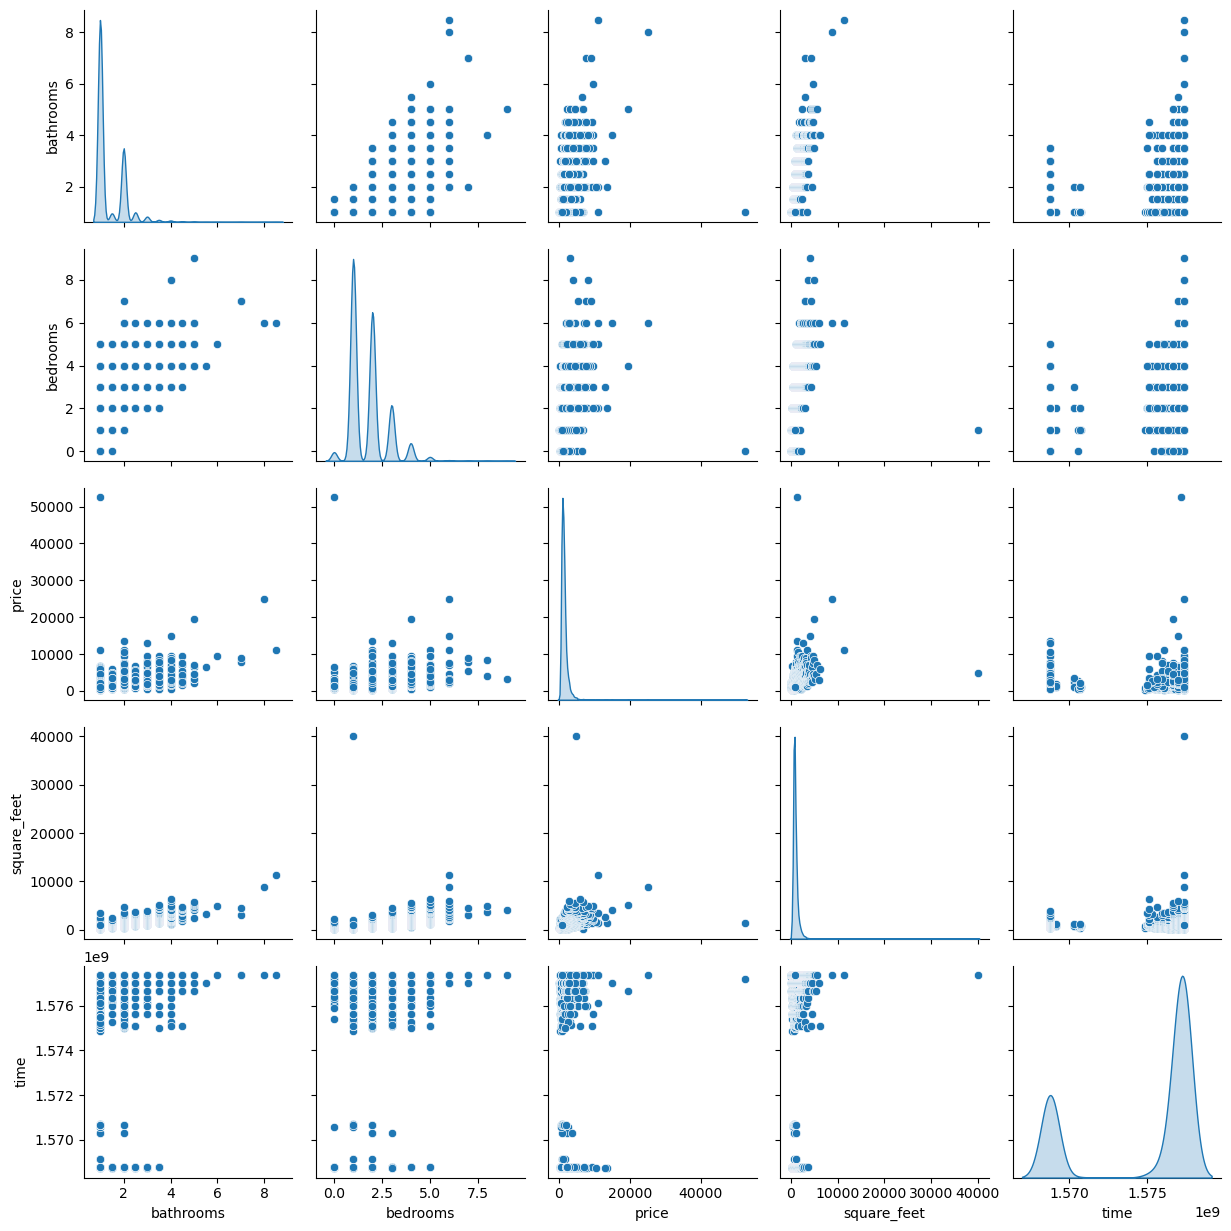

In [16]:
#Seem to be some outliers in the data that make some of them clumped up like price vs square feet
sns.pairplot(measured_df, diag_kind = "kde")

C:\Users\Aleck\AppData\Local\Temp\ipykernel_20676\2144822412.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(measured_df.corr(), vmin=-1, vmax=1, center=0, annot=True)


<Axes: >

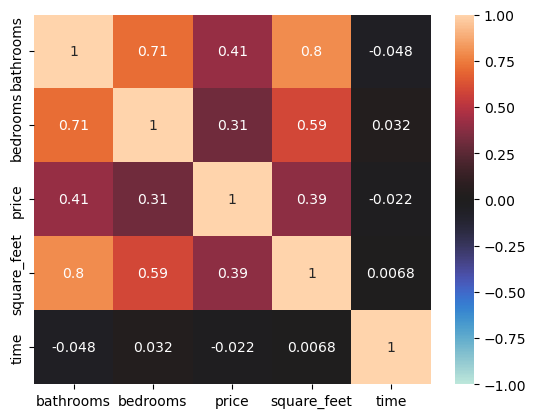

In [17]:
sns.heatmap(measured_df.corr(), vmin=-1, vmax=1, center=0, annot=True)

### Add additional columns to dataframe to track each amenity individually:

In [18]:
# Separate each amenities list into the individual amenities, generate the group of unique amenities, and add them to the dataframe

single_amenities = apartments_df['amenities'].str.split(',')

single_amenities = single_amenities.fillna("").apply(list)

amenities_count = single_amenities.apply(lambda list: len(list))

single_amenities = single_amenities.apply(lambda list: ["None"] if len(list)==0 else list)

unique_amenities = np.unique(np.concatenate(single_amenities))

print(unique_amenities)

apartments_df = apartments_df.assign(amenity_list=single_amenities)

apartments_df = apartments_df.assign(amenity_count=amenities_count)


['AC' 'Alarm' 'Basketball' 'Cable or Satellite' 'Clubhouse' 'Dishwasher'
 'Doorman' 'Elevator' 'Fireplace' 'Garbage Disposal' 'Gated' 'Golf' 'Gym'
 'Hot Tub' 'Internet Access' 'Luxury' 'None' 'Parking' 'Patio/Deck'
 'Playground' 'Pool' 'Refrigerator' 'Storage' 'TV' 'Tennis' 'View'
 'Washer Dryer' 'Wood Floors']


### Create Pairplot and Heatmap to visualize correlation between number of amenities and other numeric features:

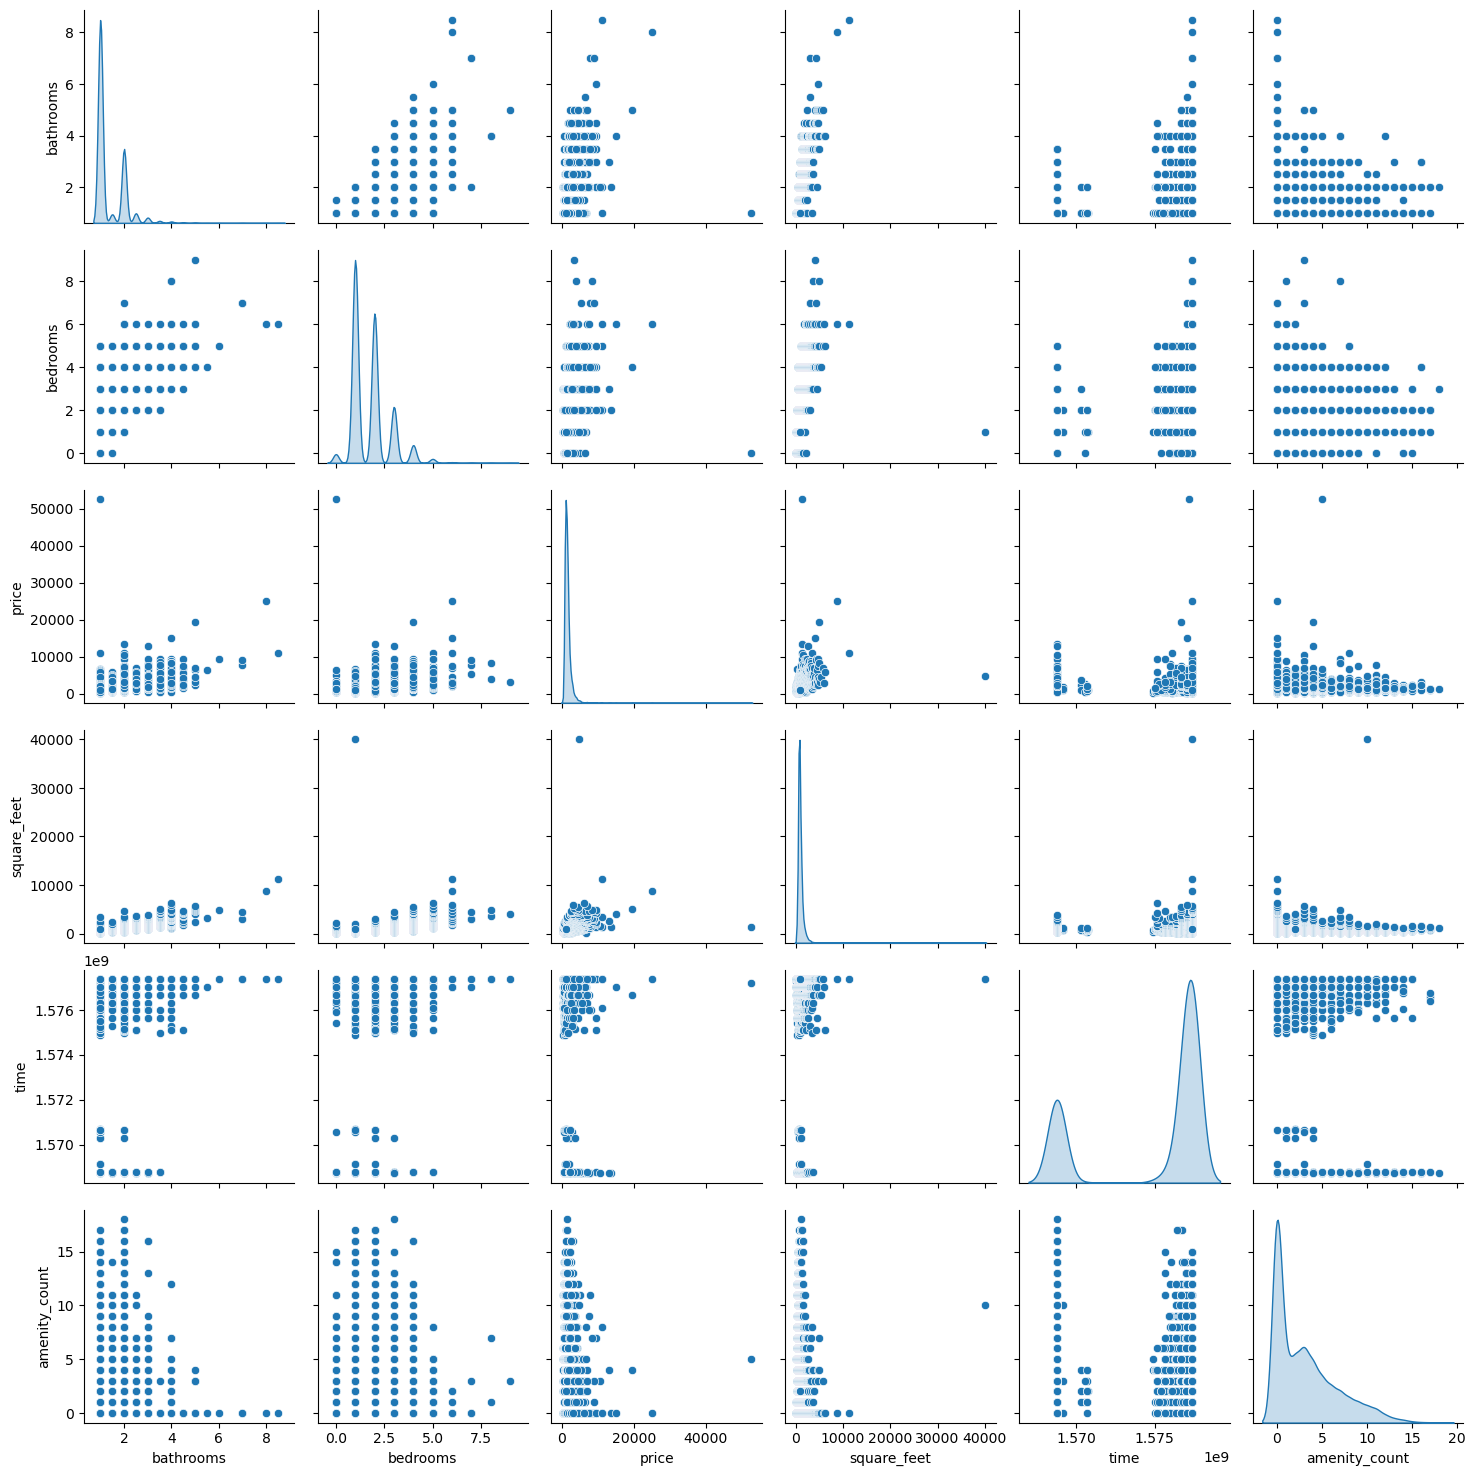

In [19]:
new_measured_df = measured_df.assign(amenity_count=amenities_count)

sns.pairplot(new_measured_df, diag_kind = "kde")

<Axes: >

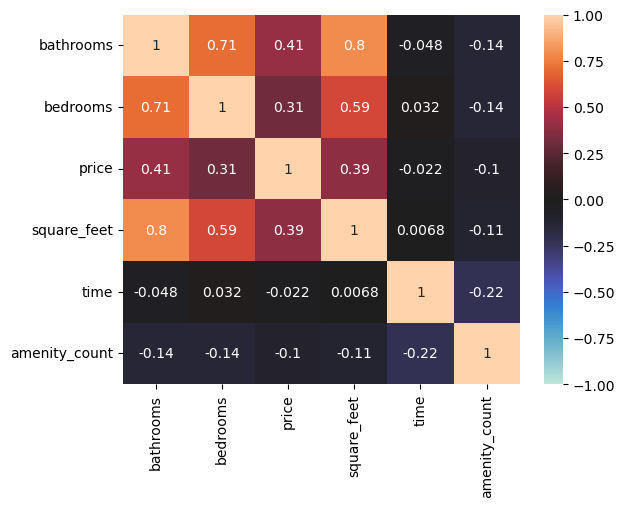

In [20]:
sns.heatmap(new_measured_df.corr(numeric_only=True), vmin=-1, vmax=1, center=0, annot=True)

### Compare each amenity to the non-amenity numeric features, via heatmap:

C:\Users\Aleck\AppData\Local\Temp\ipykernel_20676\4052446044.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


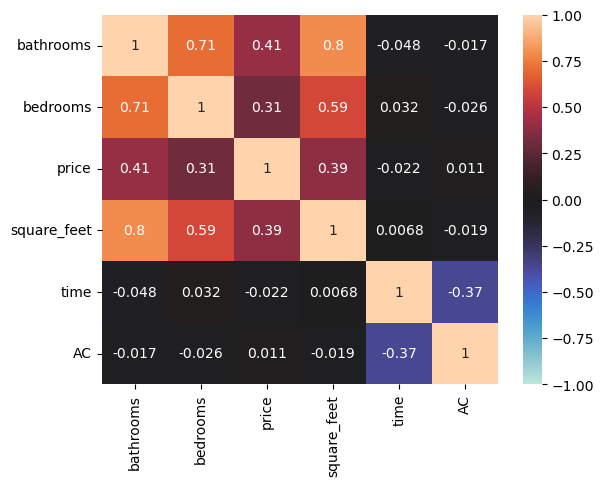

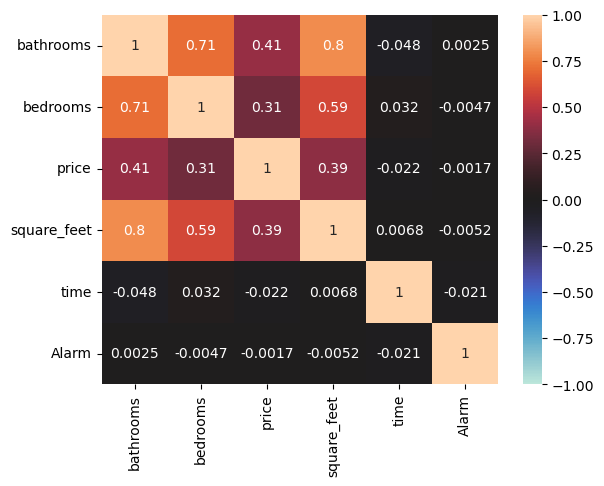

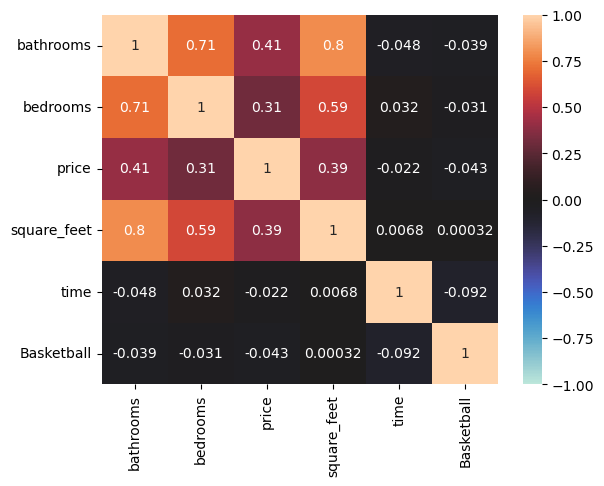

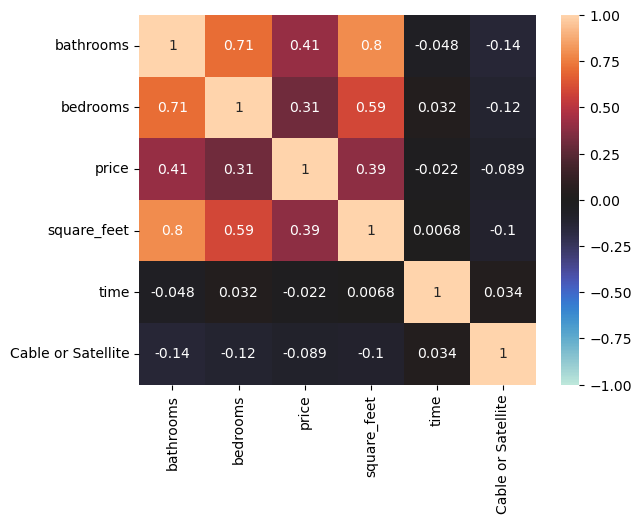

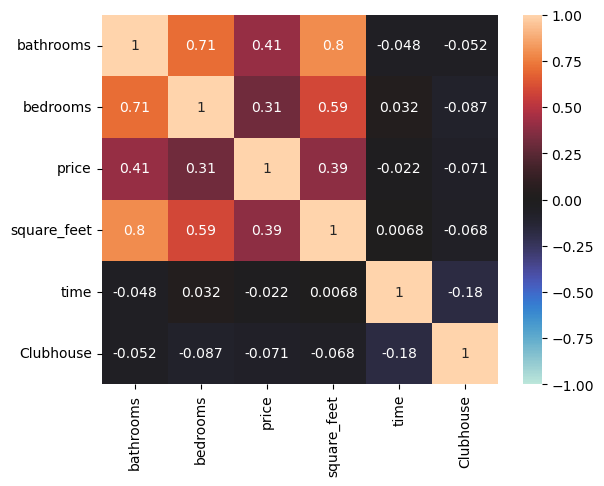

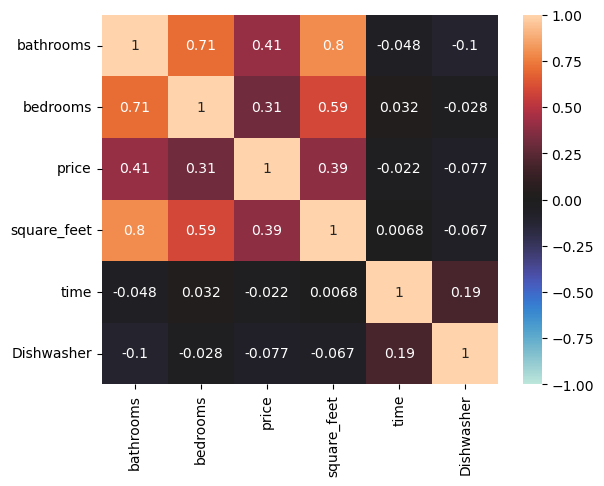

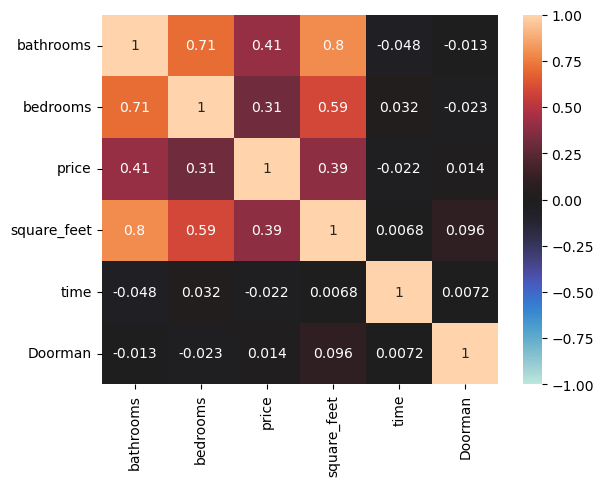

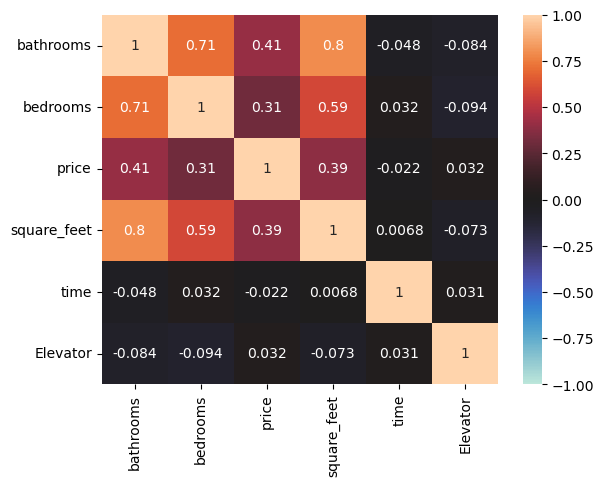

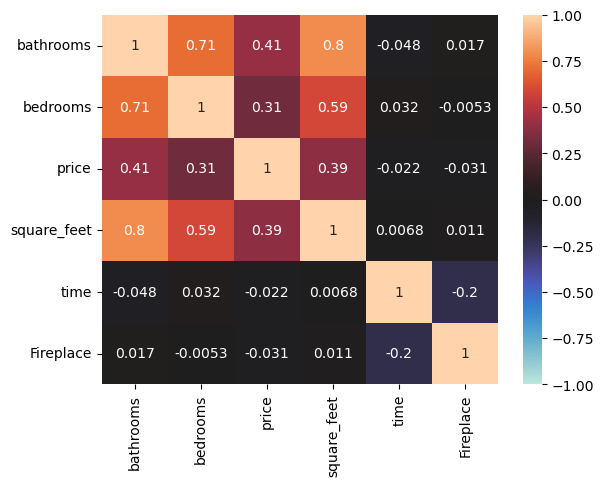

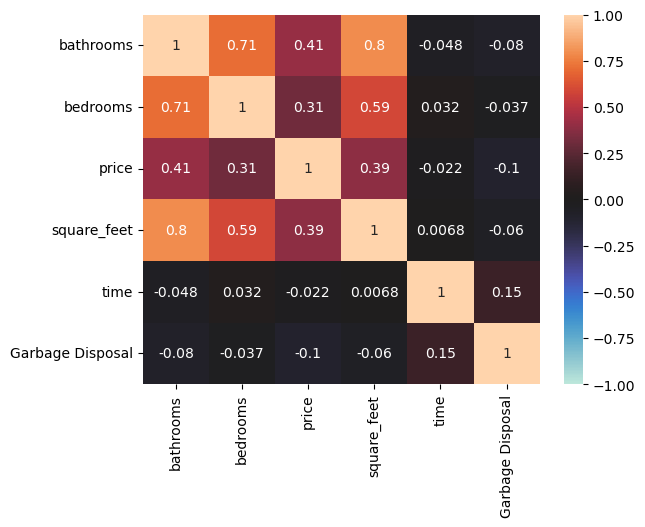

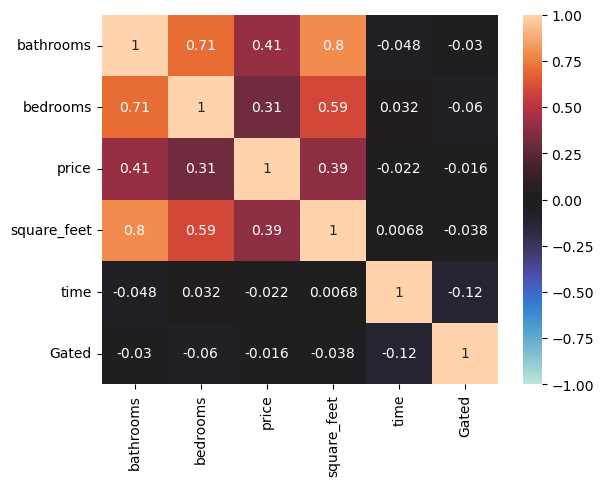

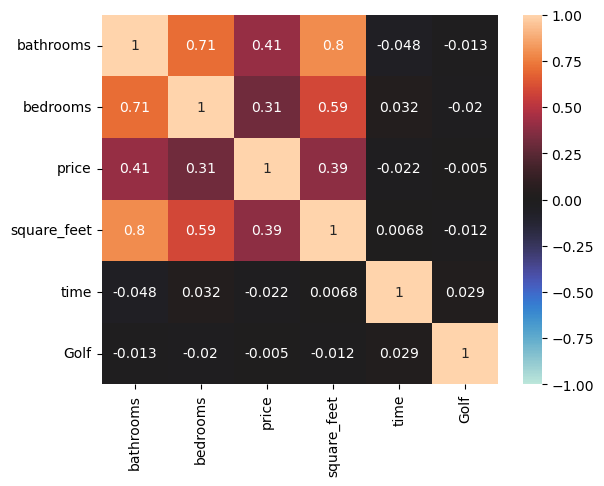

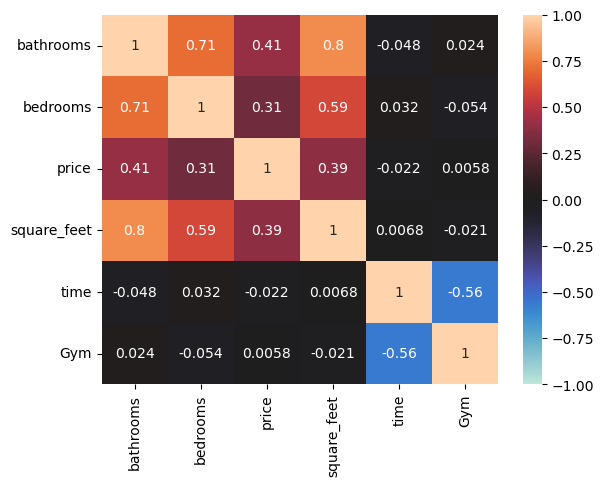

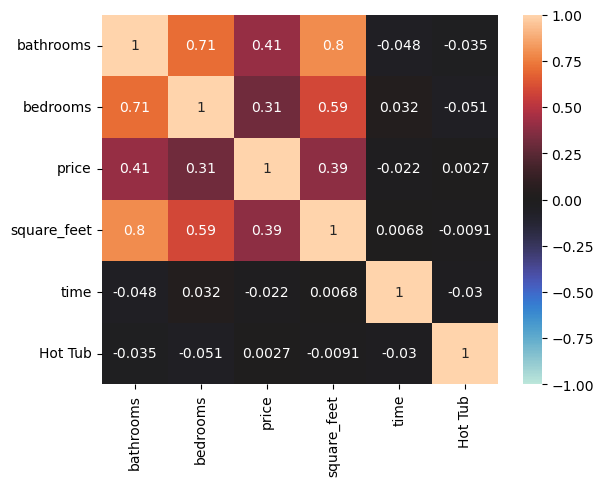

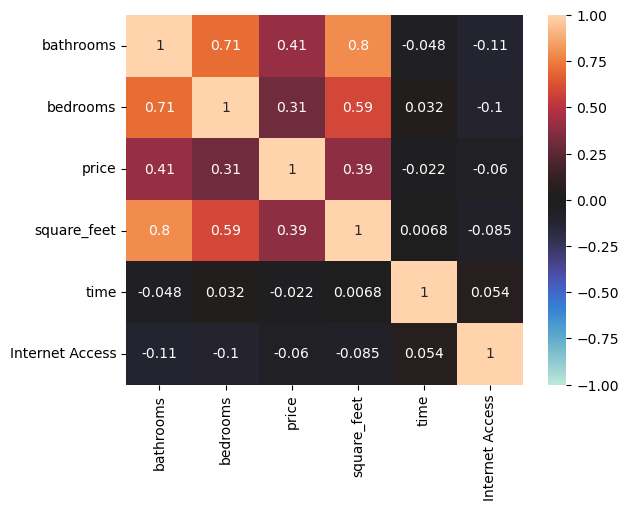

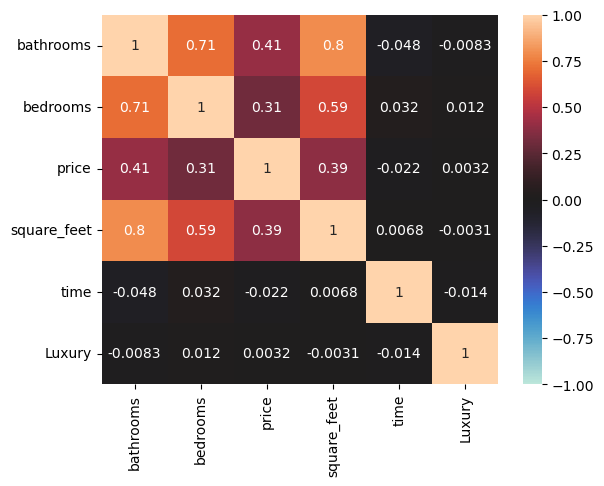

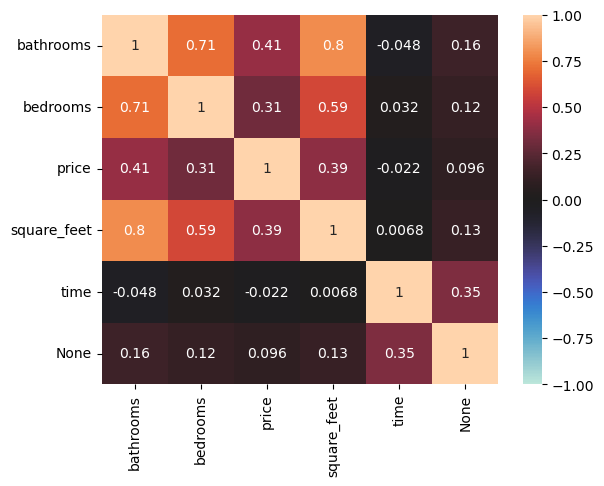

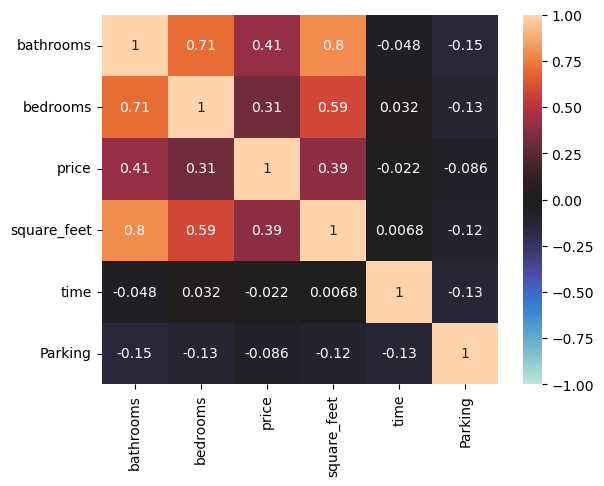

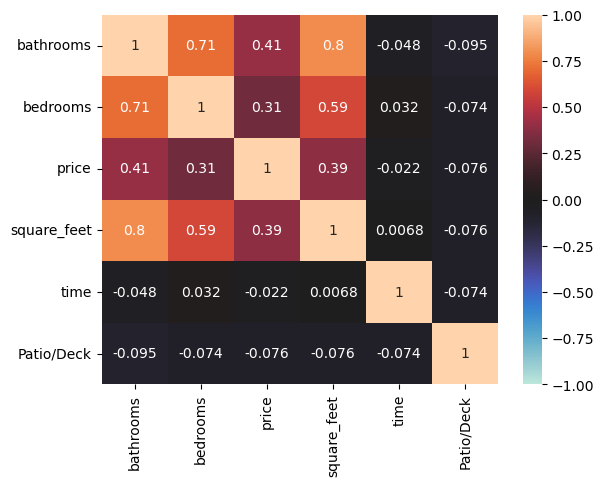

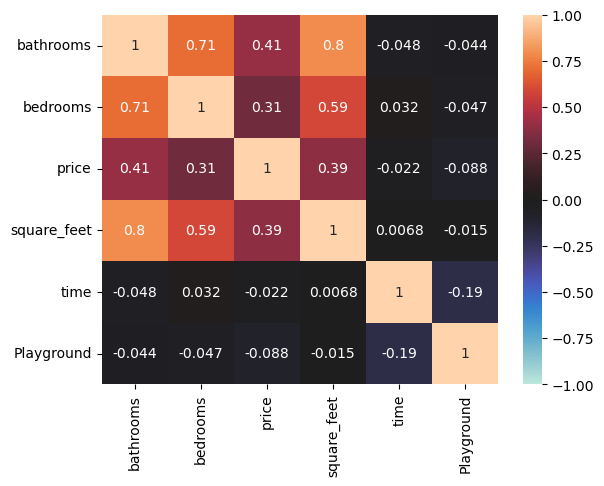

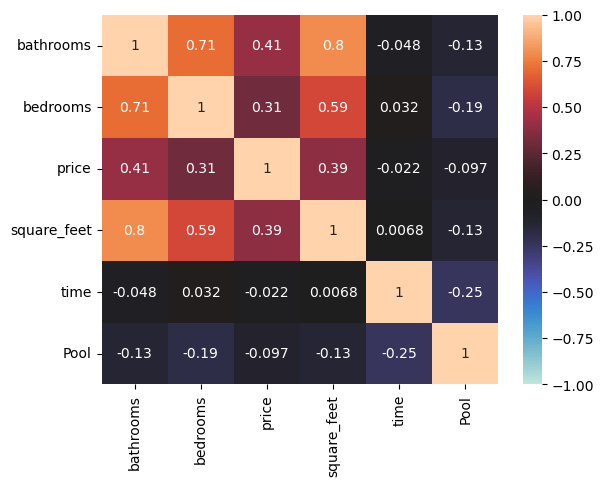

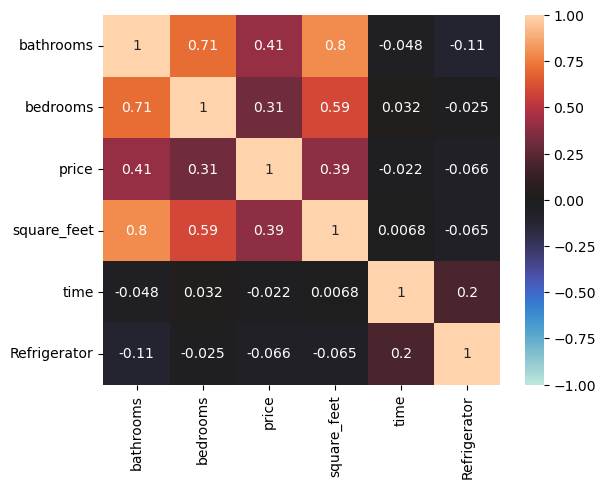

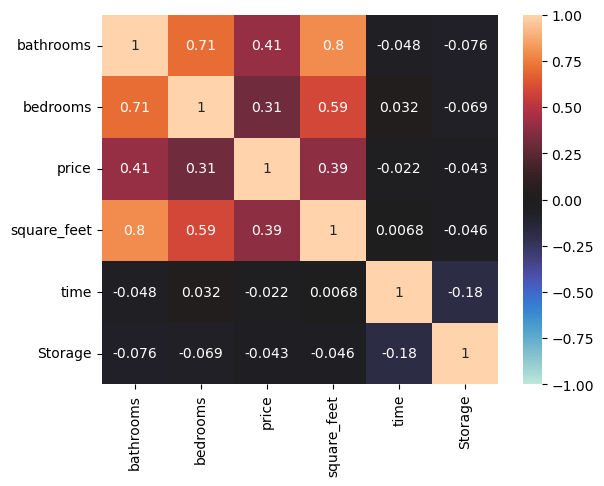

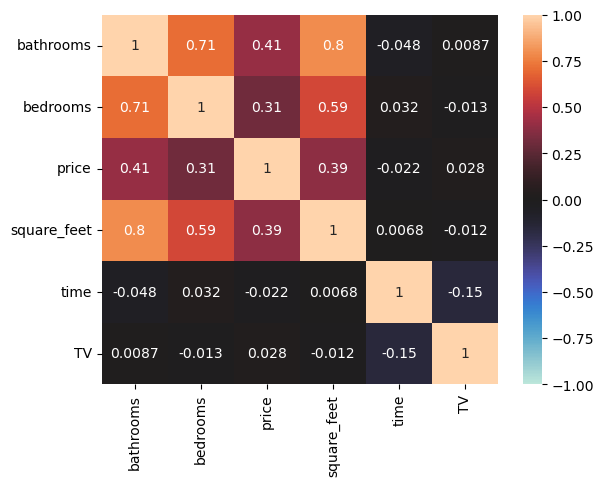

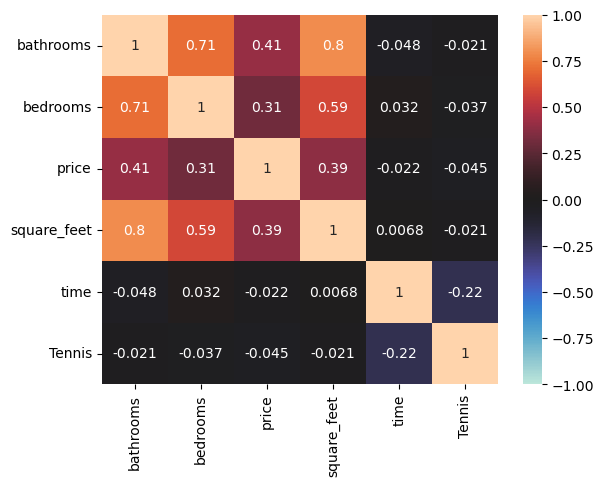

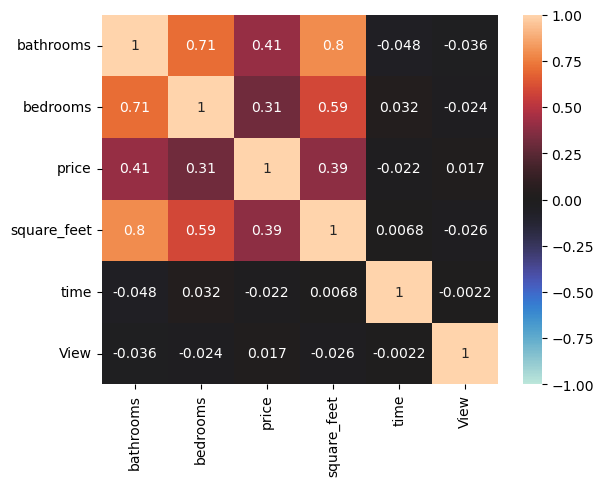

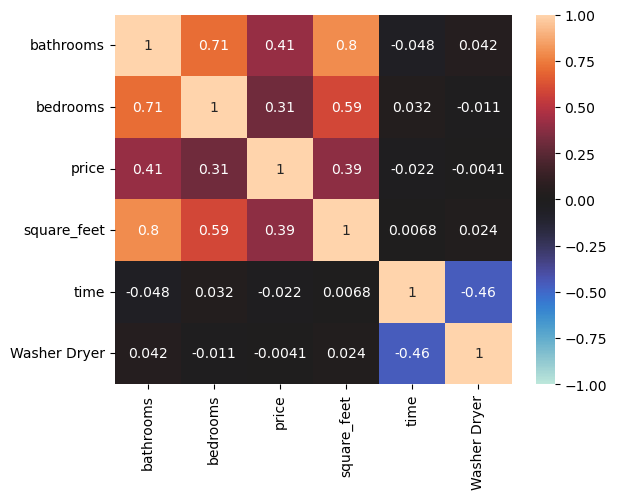

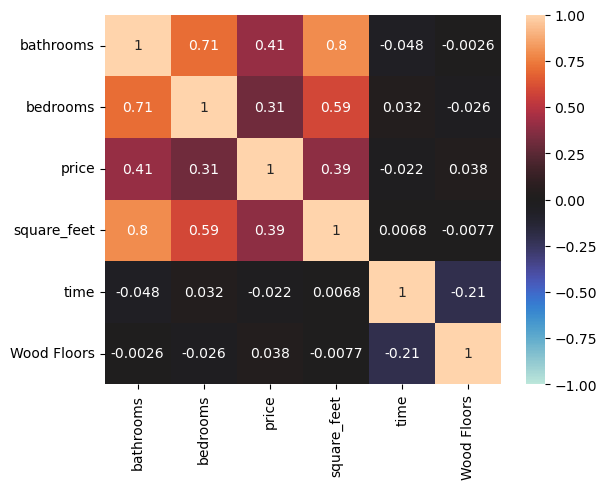

In [21]:
# Print a heatmap for the non-amenity features compared with each amenity, one at a time

categorical_measured_df = measured_df

for attribute in unique_amenities:
  plt.figure()
  has_attribute = single_amenities.apply(lambda contains: 1 if attribute in contains else 0)
  categorical_measured_df[attribute] = has_attribute
  # with pd.option_context('display.max_columns', None):
  #  display(categorical_measured_df)
  sns.heatmap(categorical_measured_df.corr(numeric_only = True), vmin=-1, vmax=1, center=0, annot=True)
  categorical_measured_df = categorical_measured_df.drop(columns=attribute)

# The results appear to demonstrate that the existence of amenities is not strongly correlated
# with price, suggesting that it is a bad input feature to use for our model.

Across all heatmaps, we verified that the correlation between popular amenities and price is typically close to zero, providing reason to safely discard the amenities column.

### Building a model: Neural Network

In [98]:
# preprocessing


measured_df_processed = measured_df.drop('fee', axis=1) #only 1 unique value
measured_df_processed = measured_df_processed.drop('amenities', axis=1) #too many categorical features
measured_df_processed = measured_df_processed.drop('cityname', axis=1) #too many categorical features
measured_df_processed = measured_df_processed.drop('state', axis=1) 


# encoder = OneHotEncoder(sparse=False)
# categories = measured_df_processed['state']
# encoder.fit_transform(categories)
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['state']))
# measured_df_processed = pd.concat([measured_df_processed.drop(['state'], axis=1), encoded_df], axis=1)

price_type_mapping = {
    'Weekly': 1,
    'Monthly|Weekly': 2,
    'Monthly': 3
}
measured_df_processed['price_type'] = measured_df_processed['price_type'].map(price_type_mapping)
measured_df_processed = measured_df_processed.fillna(0) 

measured_df_processed

bathrooms  bedrooms    price  price_type  square_feet        time  AC
0           0.0       0.0    790.0           3          101  1577359415   0
1           0.0       1.0    425.0           3          106  1577017063   0
2           1.0       0.0   1390.0           3          107  1577359410   0
3           1.0       0.0    925.0           3          116  1576667743   0
4           0.0       0.0    880.0           3          125  1577359401   0
...         ...       ...      ...         ...          ...         ...  ..
9995        4.0       5.0   6000.0           3         6300  1575112975   0
9996        8.0       6.0  25000.0           3         8716  1577360419   0
9997        8.5       6.0  11000.0           3        11318  1577360560   0
9998        0.0       1.0   4790.0           3        40000  1577362186   0
9999        1.0       1.0   1009.0           3          880  1577362141   0

[10000 rows x 7 columns]

In [91]:
# measured_df_processed.columns = measured_df_processed.columns.astype(str)
# X = measured_df_processed.drop('price',axis=1)
# y = measured_df_processed['price']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model = LinearRegression()
# model.fit(X_train, y_train)

# preds = model.predict(X_test)
# print('test error: ',mean_absolute_error(preds, y_test))

In [101]:
measured_df_processed.columns = measured_df_processed.columns.astype(str)
X = measured_df_processed.drop('price', axis=1)  
y = measured_df_processed['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(), loss='mse', metrics=['mae', 'mse']) 
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 1s 2ms/step - loss: 3442301.5000 - mae: 1469.0629 - mse: 3442301.5000 - val_loss: 3053747.5000 - val_mae: 1427.9564 - val_mse: 3053747.5000
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 2927776.7500 - mae: 1303.0005 - mse: 2927776.7500 - val_loss: 2041872.7500 - val_mae: 1093.9532 - val_mse: 2041872.7500
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 1808250.7500 - mae: 834.9279 - mse: 1808250.7500 - val_loss: 956800.2500 - val_mae: 601.1757 - val_mse: 956800.2500
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 1217564.7500 - mae: 551.4981 - mse: 1217564.7500 - val_loss: 721750.7500 - val_mae: 518.4316 - val_mse: 721750.7500
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 1132754.1250 - mae: 535.4611 - mse: 1132754.1250 - val_loss: 690652.5000 - val_mae: 524.1213 - val_mse: 690652.5000
Epoch 6/10
200/200 [======================

Training MAE is not that far from validation MAE (521 vs 509)

# Next two models: Neural Network and Gradient Boosting Machine